# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [1]:
pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675967 sha256=d9b5def465fd2f747154fc548684a52de88a259d7a793d4a1741d562d46639f0
  Stored in directory: /Users/cris/Library/Caches/pip/wheels/e9/27/5f/7defd70aaec29af33fe5e2110843e14dcfc44cba710a0dd957
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 567


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
import requests
import random
import time
from citipy import citipy



# API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Generate 500+ unique cities using citipy
cities = set()

while len(cities) < 500:
    lat = random.uniform(-90, 90)   
    lon = random.uniform(-180, 180) 
    city = citipy.nearest_city(lat, lon).city_name
    cities.add(city)  # Ensure uniqueness

cities = list(cities)  # Convert set to list
print(f"Total unique cities generated: {len(cities)}\n")

# Initialize storage for weather data
city_data = []

# Logging start
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through each city
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Track progress in sets of 50
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 1  # Reset count

    # Create API request URL
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

    try:
        #  Make API request
        response = requests.get(city_url)
        city_weather = response.json()  # Convert to JSON

        # Debug: Check API Response
        if city_weather["cod"] != 200:
            print(f"API Error: {city_weather.get('message', 'Unknown error')}")
            continue  # Skip this city

        #  Extract required data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Store the data
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except Exception as e:
        print(f"Error processing {city}: {e}")

    # Pause to avoid API rate limit issues
    time.sleep(1.1)

#  Logging end
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

#  Print sample data
print(city_data[:5]) 


Total unique cities generated: 500

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | fannuj
API Error: city not found
Processing Record 2 of Set 1 | dunedin
Processing Record 3 of Set 1 | kovalam
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | dryden
Processing Record 6 of Set 1 | paita
Processing Record 7 of Set 1 | williamstown
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | olinda
Processing Record 10 of Set 1 | chunskiy
Processing Record 11 of Set 1 | sirte
Processing Record 12 of Set 1 | verkhnevilyuysk
Processing Record 13 of Set 1 | fort bragg
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | wotho
Processing Record 16 of Set 1 | kurumul
API Error: city not found
Processing Record 17 of Set 1 | enewetak
Processing Record 18 of Set 1 | biltine
Processing Record 19 of Set 1 | tolanaro
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Se

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          468
Lat           468
Lng           468
Max Temp      468
Humidity      468
Cloudiness    468
Wind Speed    468
Country       468
Date          468
dtype: int64

In [19]:
# Display sample data 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lerwick,60.1545,-1.1494,4.68,74,9,2.37,GB,1739160484
1,kirakira,-10.4544,161.9205,29.54,68,63,3.80,SB,1739160485
2,adam,22.3756,57.5233,20.23,56,0,1.05,OM,1739160486
3,berea,41.3662,-81.8543,-3.01,68,100,5.14,US,1739160488
4,isafjordur,66.0755,-23.1240,0.80,99,100,2.08,IS,1739160489


In [53]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [54]:

# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lerwick,60.1545,-1.1494,4.68,74,9,2.37,GB,1739160484
1,kirakira,-10.4544,161.9205,29.54,68,63,3.80,SB,1739160485
2,adam,22.3756,57.5233,20.23,56,0,1.05,OM,1739160486
3,berea,41.3662,-81.8543,-3.01,68,100,5.14,US,1739160488
4,isafjordur,66.0755,-23.1240,0.80,99,100,2.08,IS,1739160489


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

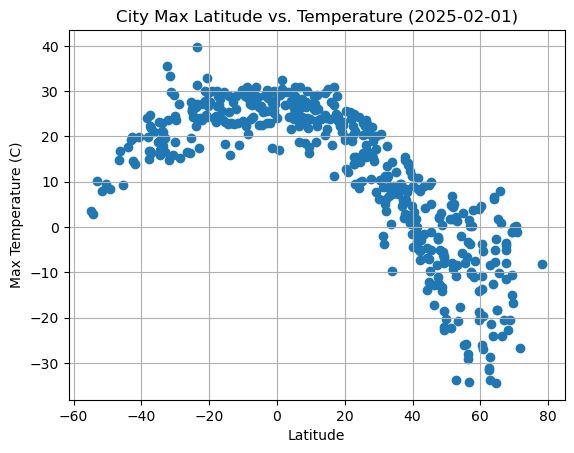

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2025-02-01)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

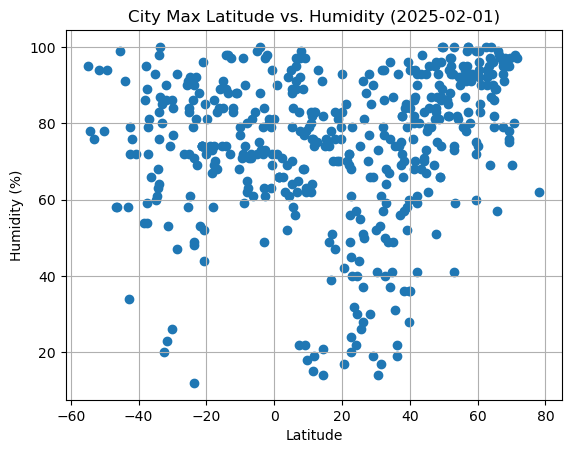

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2025-02-01)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot


Latitude Vs. Cloudiness

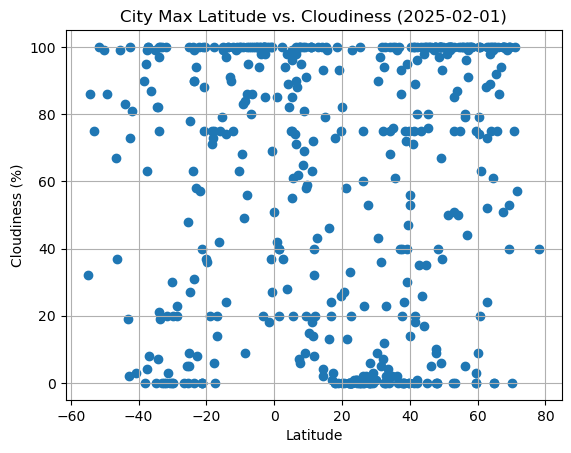

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2025-02-01)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


Latitude vs. Wind Speed Plot

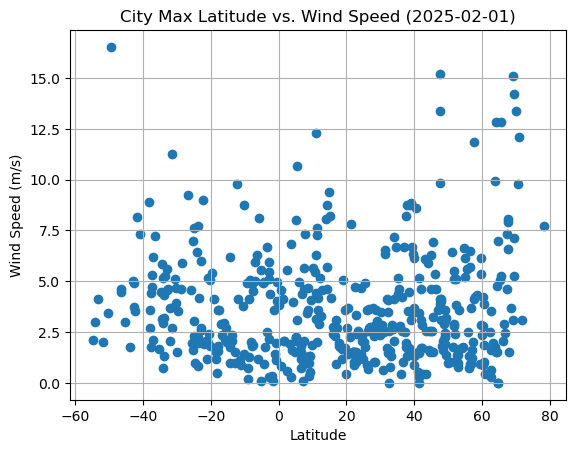

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2025-02-01)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

Requirement 2: Compute Linear Regression for Each Relationship

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lerwick,60.1545,-1.1494,4.68,74,9,2.37,GB,1739160484
2,adam,22.3756,57.5233,20.23,56,0,1.05,OM,1739160486
3,berea,41.3662,-81.8543,-3.01,68,100,5.14,US,1739160488
4,isafjordur,66.0755,-23.1240,0.80,99,100,2.08,IS,1739160489
5,mboursou lere,9.7639,14.1539,23.91,18,59,1.87,TD,1739160490


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,kirakira,-10.4544,161.9205,29.54,68,63,3.80,SB,1739160485
6,tandil,-37.3217,-59.1332,16.85,72,100,5.29,AR,1739160492
7,arraial do cabo,-22.9661,-42.0278,23.69,92,94,5.98,BR,1739160493
9,alofi,-19.0595,-169.9187,29.94,74,20,4.12,NU,1739160495
16,paciran,-6.8767,112.3761,29.44,71,80,5.94,ID,1739160504


Temperature vs. Latitude Linear Regression Plot

y = -0.71x +31.98
The r^2-value is: 0.74542005715565


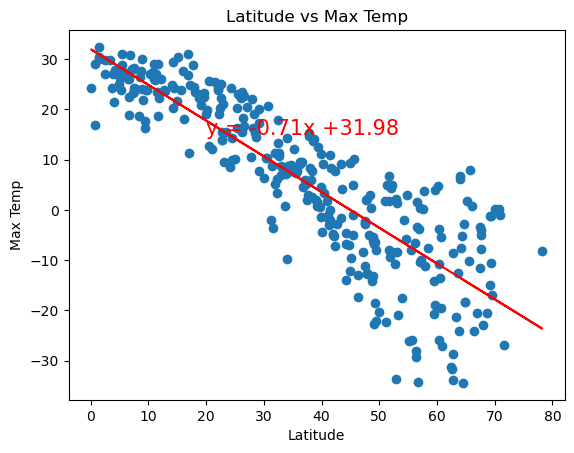

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-") 

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red",)
plt.title(f"Latitude vs Max Temp")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.28x +29.55
The r^2-value is: 0.4174060664637105


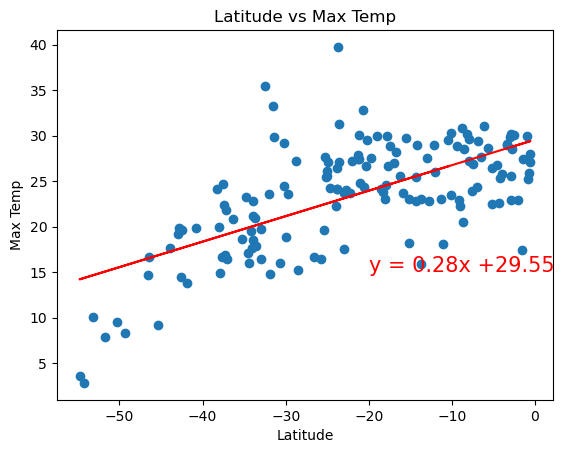

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-") 

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-20,15),fontsize=15,color="red",)
plt.title(f"Latitude vs Max Temp")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

Humidity vs. Latitude Linear Regression Plot

y = 0.39x +59.55
The r^2-value is: 0.13394872033560354


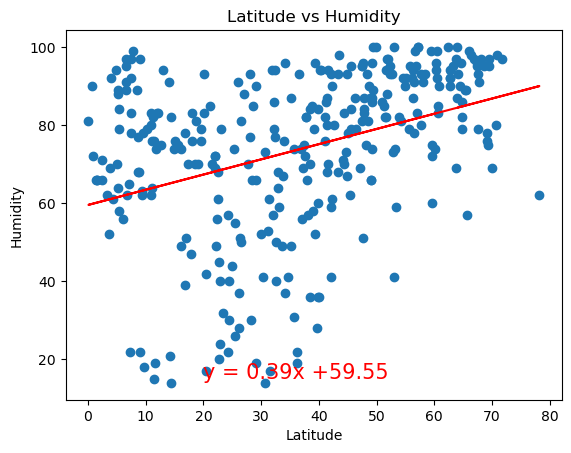

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-") 

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red",)
plt.title(f"Latitude vs Humidity")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.09x +77.03
The r ^2-value is 0.005660742902613358


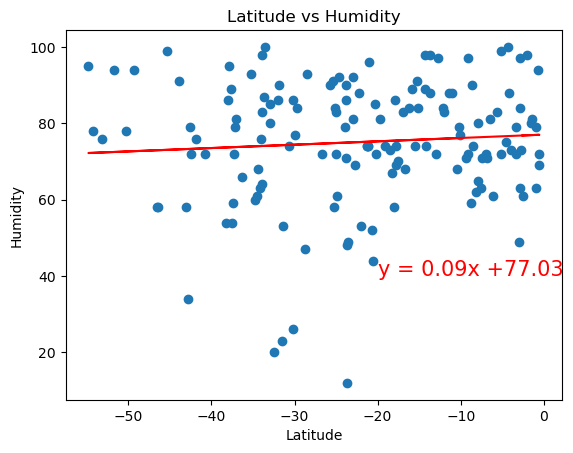

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation 
plt.xlabel( 'Latitude')
plt.ylabel( 'Humidity')
plt.annotate(line_eq, (-20,40), fontsize =15, color="red")
plt.title(f"Latitude vs Humidity")

# Print r^2 value
print(f"The r ^2-value is {rvalue**2}")

# Show plot
plt.show()

Cloudiness vs. Latitude Linear Regression Plot

y = 0.46x +39.6
The r^2-value is: 0.051770599066912615


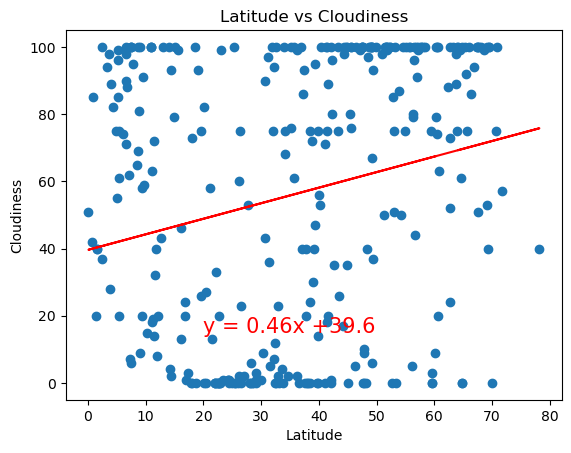

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-") 

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red",)
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value 
print (f"The r^2-value is: {rvalue**2}")

plt.show()

y =0.69x +78.47
The r^2 value is: 0.06353047187569798


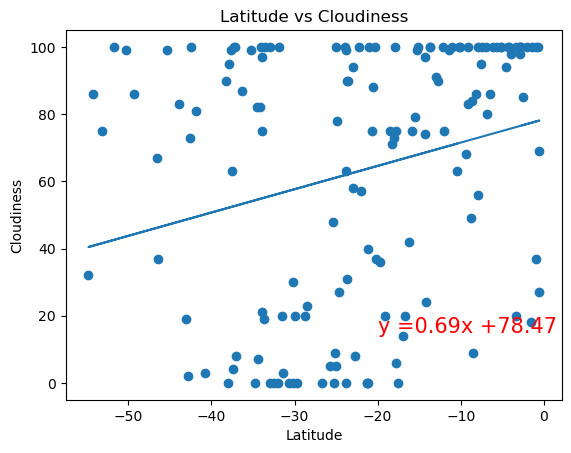

In [47]:
# Southern Hemisphere 
x_values = southern_hemi_df["Lat"]
y_values =  southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values)

# Label plot and annotate the line equation 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-20,15), fontsize=15,color="red",)
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value
print(f"The r^2 value is: {rvalue**2}")

plt.show()

Wind Speed vs. Latitude Linear Regression Plot

y = 0.02x + 2.76
The r^2-value is 0.025258203799151387


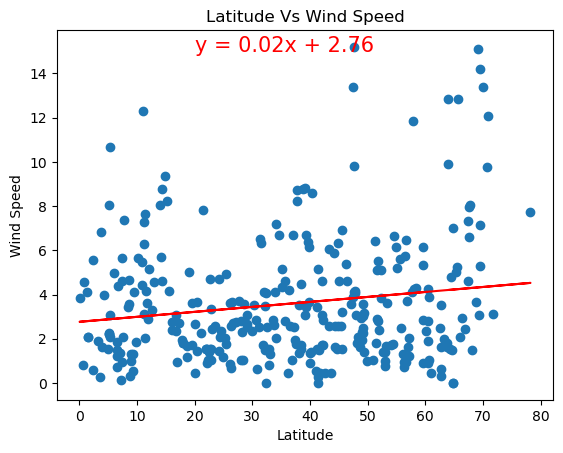

In [49]:
# Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str (round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red",)
plt.title(f"Latitude Vs Wind Speed")

# Print r^2 value
print(f"The r^2-value is {rvalue**2}")

plt.show()

y=-0.04x + 2.85
The r^2-value is: 0.04550954442067315


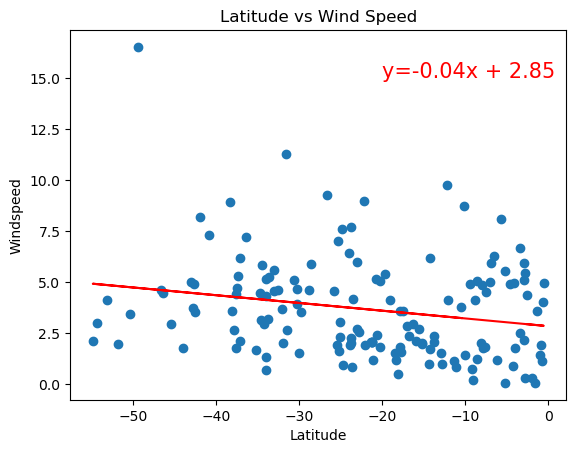

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq ="y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter (x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.annotate(line_eq,(-20,15), fontsize=15, color="red")
plt.title(f"Latitude vs Wind Speed")

# Print r^2 value 
print(f"The r^2-value is: {rvalue**2}")

plt.show()